In [1]:
%matplotlib inline

import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

D:\AN\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
#导入数据集
mnist = input_data.read_data_sets('MNIST_data',one_hot=True)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


0.23182636


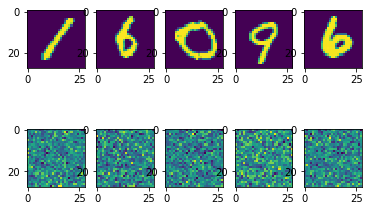

0.23146015


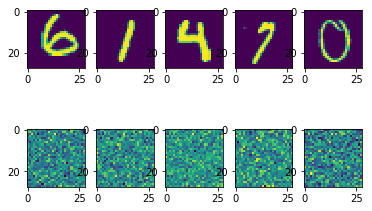

0.23217496


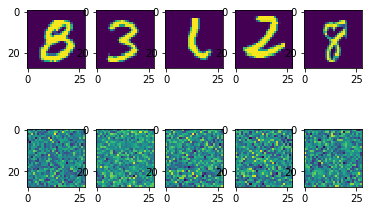

0.23068145


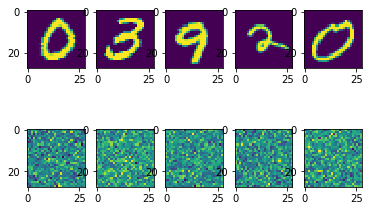

0.22952735


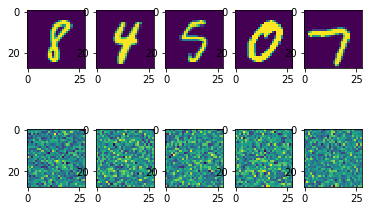

0.23004396


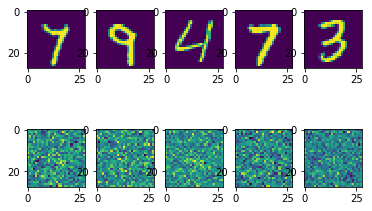

0.22854541


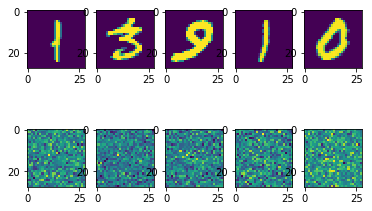

0.22729367


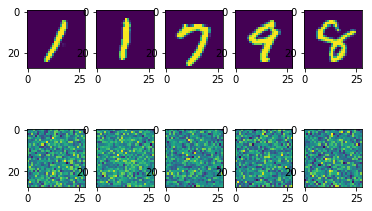

0.22430667


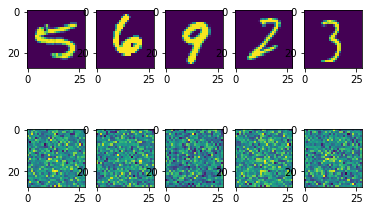

In [ ]:
with tf.Graph().as_default() as g:
    inp_out = tf.placeholder(shape=[None,784],dtype=tf.float32)
    h = tf.keras.layers.Dense(32,activation=tf.nn.relu)(inp_out)
    out = tf.keras.layers.Dense(784,activation=tf.nn.sigmoid)(h)
    
    #代价函数
    loss = tf.reduce_mean(tf.keras.losses.mean_squared_error(inp_out,out))
    #保存模型
    saver = tf.train.Saver()
    
with tf.Session(graph=g) as sess:
    #优化器
    optim = tf.train.GradientDescentOptimizer(learning_rate=0.01)
    train_op = optim.minimize(loss)
    sess.run(tf.global_variables_initializer())
    
    for i in range(5000):
        #返回的是batch_img和batch_lab，后者不需要故用下划线代替
        batch_img,_ = mnist.train.next_batch(32)
        
        res_loss,_ = sess.run([loss,train_op],feed_dict={inp_out:batch_img})
        
        if i % 500 == 0:
            print(res_loss)
            batch_img,_ = mnist.test.next_batch(32)
            res_out = sess.run(out,feed_dict={inp_out:batch_img})
            
            for j in range(10):
                plt.subplot(2,5,j + 1)
                img = batch_img[j] if j < 5 else res_out[j]
                img = (img * 255).astype(np.uint8).reshape([28,28]) 
                plt.imshow(img)
            plt.show()
        